In [1]:
import numpy as np
import gc
import matplotlib.pyplot as plt
from sklearn_sfa_master.sksfa import HSFA
from sklearn.preprocessing import StandardScaler

In [38]:
data = np.load('data/data_squareRoom.npy')
crop_h = 20
crop_w = 10
dim_step= 2
data = data[:, crop_h:-crop_h, crop_w:-crop_w][:, ::dim_step][:, :, ::dim_step]
gc.collect()
print(data.shape)

(22000, 15, 95, 3)


In [39]:
# images = [x.flatten() for x in data[:1000]]
scaler = StandardScaler()
images = data

n_samples = 1000
image_width, image_height = 190, 30
dimension = image_width * image_height

layer_configurations = [(5, 5, 5, 5, 4, 1)]
hsfa = HSFA(3, images.shape[1:], layer_configurations, noise_std=0.1)
hsfa = hsfa.fit(images)
slow_features = hsfa.transform(images)

pos 1: [ 1.06514319 -1.49247282  0.6125459 ]
pos 2: [0.94305297 0.0661029  0.46373397]


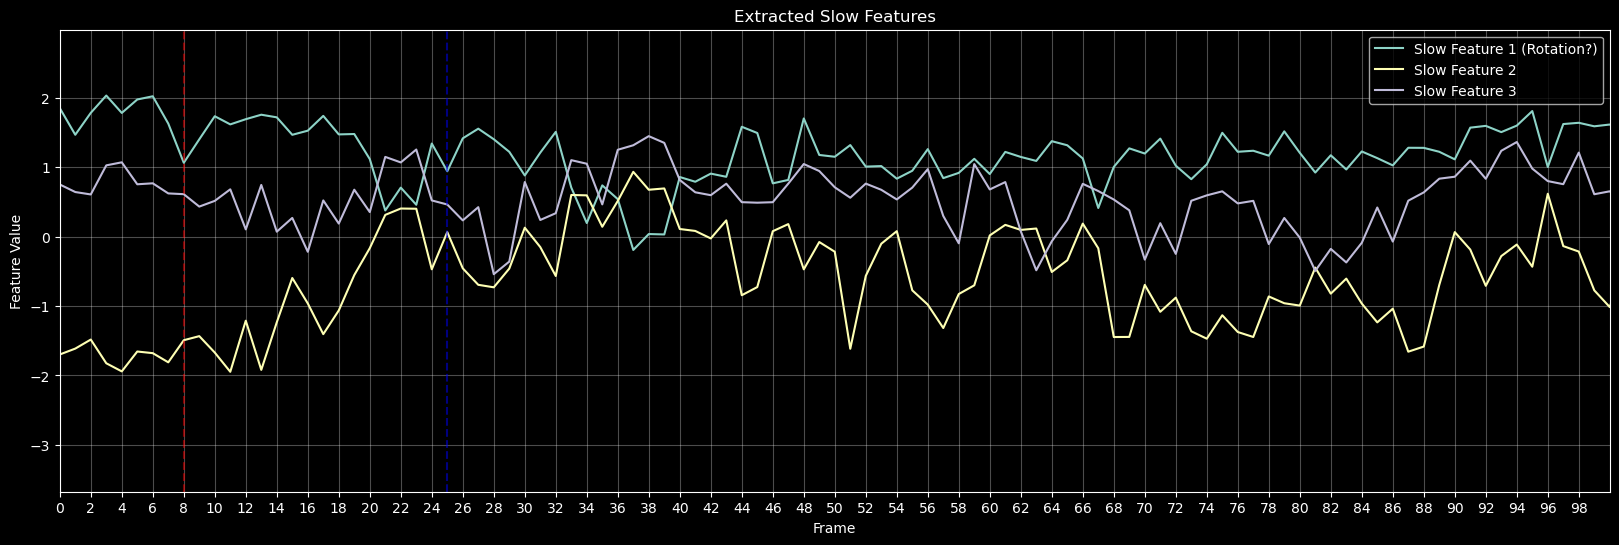

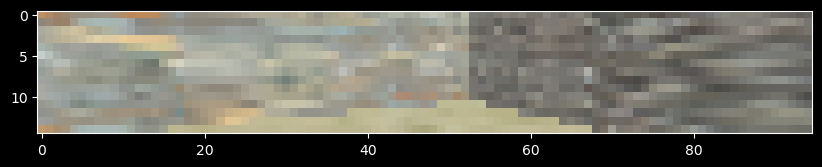

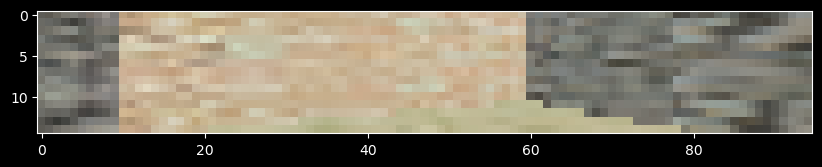

In [47]:
fig = plt.figure(figsize=(20, 6))
ax = fig.add_subplot()

index1 = 8
index2 = 25

ax.plot(slow_features[:, 0], label="Slow Feature 1 (Rotation?)")
ax.plot(slow_features[:, 1], label="Slow Feature 2")
ax.plot(slow_features[:, 2], label="Slow Feature 3")
print('pos 1:', slow_features[index1])
print('pos 2:', slow_features[index2])
ax.legend()
ax.grid(alpha=.3)
hline = ax.axvline(index1, c='r', alpha=.5, linestyle='--')
hline = ax.axvline(index2, c='b', alpha=.5, linestyle='--')
plt.title("Extracted Slow Features")
plt.xlabel("Frame")
plt.ylabel("Feature Value")
length = 100
plt.xlim(0,length)
plt.xticks(np.arange(0, length, 2))

plt.figure(figsize=(10, 5))
plt.imshow(data[index1])
plt.figure(figsize=(10, 5))
plt.imshow(data[index2])
plt.show()